In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

#### Uploading Data

In [2]:
data_1 = pd.read_csv('../data/data_1.csv')
data_2 = pd.read_csv('../data/data_2.csv')
data_3 = pd.read_csv('../data/data_5.csv')
data_4 = pd.read_csv('../data/data_6.csv')
data_5 = pd.read_csv('../data/data_7.csv')


#### Merging DFs

In [3]:
frames = [data_1, data_2, data_3, data_4, data_5]
data = pd.concat(frames)

In [27]:
def df_info(df):
    print(f"Data Shape: {df.shape}")
    df_chack = pd.DataFrame(df.dtypes, columns=['dtypes'])
    df_chack = df_chack.reset_index()
    df_chack['name'] = df_chack['index']
    df_chack = df_chack[['name', 'dtypes']]
    df_chack['isnull'] = df.isnull().sum().values
    df_chack['% null'] = round((df_chack['isnull']/len(df))*100,2)
    df_chack['num_unique'] = df.nunique().values
    df_chack['first_value'] = df.values[0]
    return df_chack


df_info(data)

Data Shape: (6488, 40)


,name,dtypes,isnull,% null,num_unique,first_value
0,authorName,object,54,0.83,5850,Lindsey L
1,googleMapsPlaceId,object,0,0.00,365,ChIJAQReQIdZwokR1rcwiar_XqM
2,placeAddress,object,1,0.02,393,"Orchard Grocer, 78 Orchard St, New York, NY 10..."
3,placeName,object,0,0.00,354,Orchard Grocer
4,placeUrl,object,0,0.00,399,https://page-service.doordash.com/store/orchar...
5,provider,object,0,0.00,4,door-dash
6,reviewDate,object,53,0.82,5876,2022-02-21T18:18:00.620Z
7,reviewId,object,899,13.86,5409,NaN
8,reviewRating,float64,600,9.25,5,5.0
9,reviewText,object,1545,23.81,4597,This is the best vegan breakfast I've had on d...


In [ ]:

df = data.copy()

### Data Cleaning

In [ ]:
# Drop columns with less than 10 imaged
for num in range(12, 28):
    name_column = f"reviewImages/{num}"
    if name_column in df.columns:
        df.drop(name_column, axis=1, inplace=True)

In [ ]:
# Data After Drop
df_info(df)

Data Shape: (6488, 24)


,name,dtypes,isnull,% null,num_unique,first_value
0,authorName,object,54,0.83,5850,Lindsey L
1,googleMapsPlaceId,object,0,0.00,365,ChIJAQReQIdZwokR1rcwiar_XqM
2,placeAddress,object,1,0.02,393,"Orchard Grocer, 78 Orchard St, New York, NY 10..."
3,placeName,object,0,0.00,354,Orchard Grocer
4,placeUrl,object,0,0.00,399,https://page-service.doordash.com/store/orchar...
5,provider,object,0,0.00,4,door-dash
6,reviewDate,object,53,0.82,5876,2022-02-21T18:18:00.620Z
7,reviewId,object,899,13.86,5409,NaN
8,reviewRating,float64,600,9.25,5,5.0
9,reviewText,object,1545,23.81,4597,This is the best vegan breakfast I've had on d...


<Axes: >

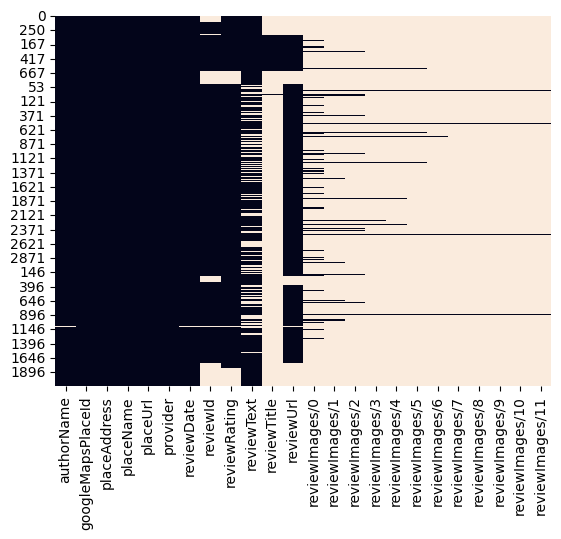

In [26]:
sns.heatmap(df.isnull(), cbar=False)

#### Data Distribution

<Axes: title={'center': 'Provider Distribution'}, ylabel='count'>

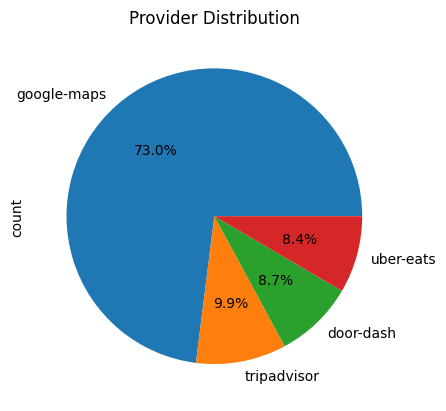

In [4]:

data['provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Provider Distribution')

<Axes: title={'center': 'Review Text Length Distribution'}, ylabel='Frequency'>

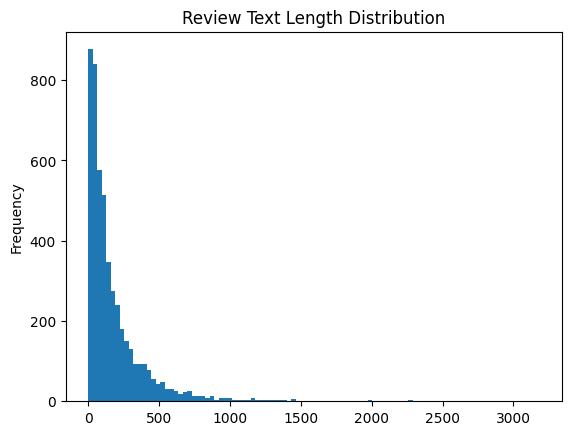

In [10]:
data['reviewText'].str.len().plot(kind='hist', bins=100, title='Review Text Length Distribution')

array([[<Axes: title={'center': 'reviewRating'}>]], dtype=object)

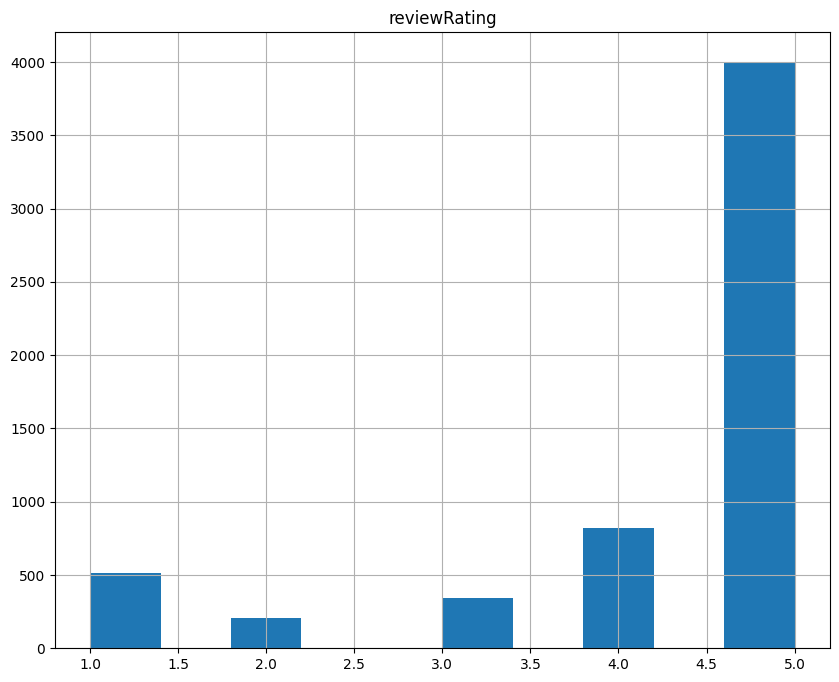

In [24]:
df.hist(figsize=(10,8))

In [5]:
def create_place_review_pivot(df):
    # Count places per provider
    provider_place_counts = df.groupby(['provider', 'placeName']).size().reset_index(name='place_count')
    # Count reviews per place
    place_review_counts = df.groupby(['provider', 'placeName'])['reviewText'].count().reset_index(name='review_count')
    # Merge the two dataframes
    merged_counts = pd.merge(provider_place_counts, place_review_counts, on=['provider', 'placeName'])
    
    pivot = pd.pivot_table(
        merged_counts, 
        values='review_count',
        index='placeName',
        columns='provider',
        aggfunc='sum',
        fill_value=0
    )
    
    pivot['Total_Reviews'] = pivot.sum(axis=1)

    return pivot


In [6]:
create_place_review_pivot(data)

provider,door-dash,google-maps,tripadvisor,uber-eats,Total_Reviews
placeName,,,,,
718 Bistro,0,1,0,0,1
9 Rabbits Bakery,0,0,0,5,5
ANDO patisserie,0,1,0,0,1
Adalya,0,0,0,0,0
Akdeniz Mediterranean Cuisine,0,19,0,5,24
...,...,...,...,...,...
World Famous Dark Horse Bar,0,0,100,0,100
Wynkoop Brewing Company,0,0,100,0,100
Yerman's Irish Pub,0,3,0,0,3


In [32]:
data.groupby('placeName')['reviewText'].nunique().sort_values(ascending=False).head(10)

placeName
Home Frite                          432
Red Lobster                         394
World Famous Dark Horse Bar         100
Bistro Vendome                      100
Wynkoop Brewing Company             100
The Pub On The Bricks                99
Priya's Indian Kitchen               91
Paris Baguette                       91
Sound + Fury Brewery and Kitchen     85
Petit Chou                           84
Name: reviewText, dtype: int64

#### Finding Duplication

In [41]:
duplicate_reviews = data[data.duplicated(subset=['reviewText','authorName','reviewDate','provider'], keep=False)].sort_values(by='reviewText')
duplicate_reviews

,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewId,reviewRating,reviewText,...,reviewImages/18,reviewImages/19,reviewImages/20,reviewImages/21,reviewImages/22,reviewImages/23,reviewImages/24,reviewImages/25,reviewImages/26,reviewImages/27


In [ ]:
data = data.drop_duplicates(subset=['reviewText', 'authorName', 'reviewDate', 'provider'], keep='first')

TypeError: 'DataFrame' object is not callable